# Hurricane tracts

This is a dataset I typically use for my Intro to Tableau workshop. I wanted to show how you could do the same visualizations in Altair that I cover there.

In [12]:
import pandas as pd
import altair as alt
from numpy import float64

## Read in hurricane tracts data

Specify that Season shouldn't be parsed as a number, even though it looks like that – keep as string

In [13]:
df = pd.read_csv('data/hurricane_tracts.csv', 
                       dtype={'Season':object, 'Wind in knots':float64})

## Change ISO_time to a true date and time data type

and then check the types again

In [14]:
df['ISO_time'] = pd.to_datetime(df.ISO_time)
df.dtypes

Longitude                       float64
Latitude                        float64
Serial_Num                       object
Season                           object
Num                               int64
Basin                            object
Sub_basin                        object
Hurricane Name                   object
ISO_time                 datetime64[ns]
Nature                           object
Wind in knots                   float64
Pressure in millibars           float64
Wind Percentile                 float64
Pressure Percentile             float64
Track_type                       object
State                            object
SubRegion                        object
Region                           object
Country                          object
dtype: object

### Summary of the data statistics

## MaxRowsError

Can take off limit for number of rows, but that's not a great idea because the notebook will have a Vega-Lite JSON specification (text) embedded for every output pane, which also includes the data, so you end up with huge notebooks!

Instead, we can specify that the outputs should just refer to a JSON file on your local drive and load in the data from there for each plot.

See the Altair tutorial notebook `03-Binning-and-aggregation` for more details.

In [4]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Cumulative count of records per hurricane season

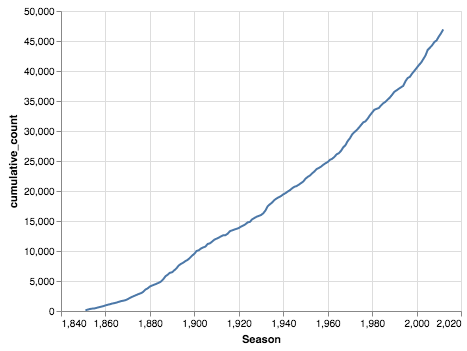

In [20]:
# Season is just a column of strings denoting in which hurricane season
# the current row's measurement was taken. 
# Feeding only the data needed speeds things up quite a bit in this case.

season_records = df[['Season']]

# frame is number of records [preceding,following] offset from current data object
# None indicates all, so default [None, 0] indicates all preceding and zero following

alt.Chart(season_records).mark_line().encode(
    y='cumulative_count:Q',
    x='Season:Q'
).transform_aggregate(
    count='count()',
    groupby=['Season']
).transform_window(
    cumulative_count='sum(count)',
    frame=[None, 0]
)